### import library

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the data

In [5]:
myData = pd.read_csv("ms_data.csv")

### Walking Speed Analysis
#### Scatter plot of age vs walking speed with regression line

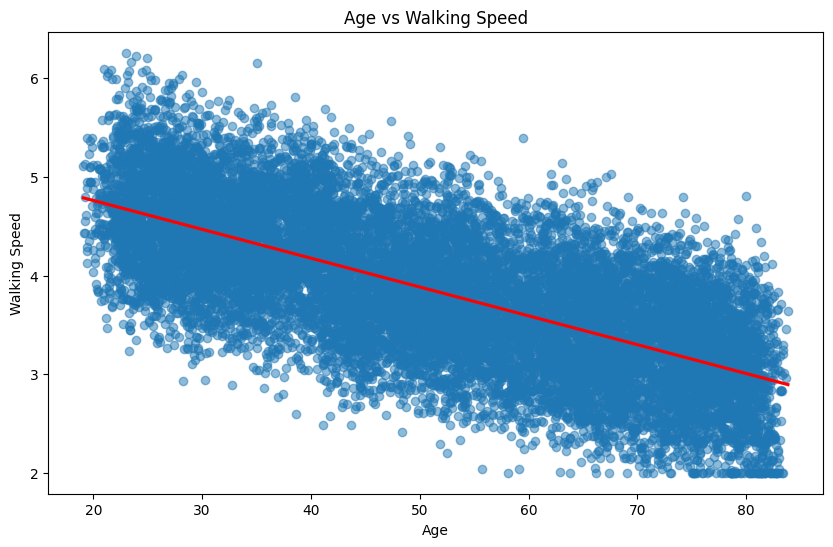

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='walking_speed', data=myData, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Age vs Walking Speed")
plt.xlabel("Age")
plt.ylabel("Walking Speed")
plt.savefig("scatterplot.png")
plt.show()

#### Box plots by education level

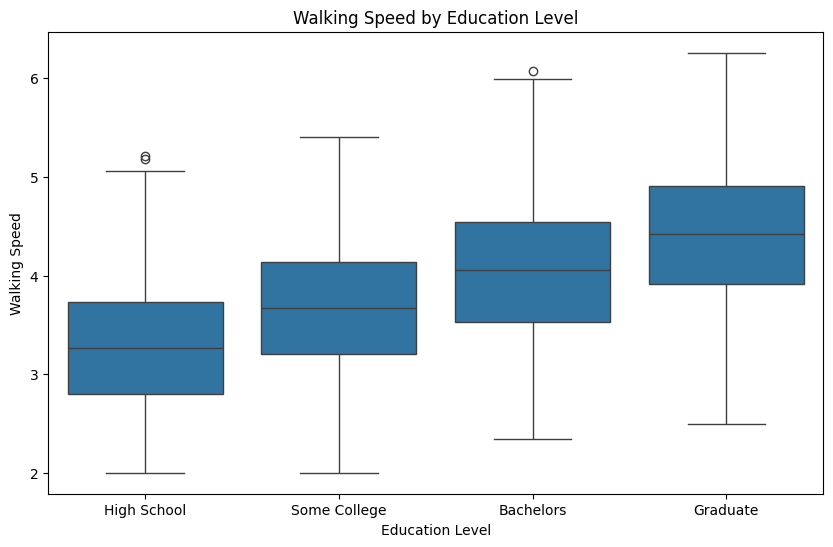

In [7]:
order = ["High School", "Some College", "Bachelors", "Graduate"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_level', y='walking_speed', data=myData, order = order)
plt.title("Walking Speed by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Walking Speed")
plt.savefig("Boxplot.png")
plt.show()

#### Line plot showing education age interaction

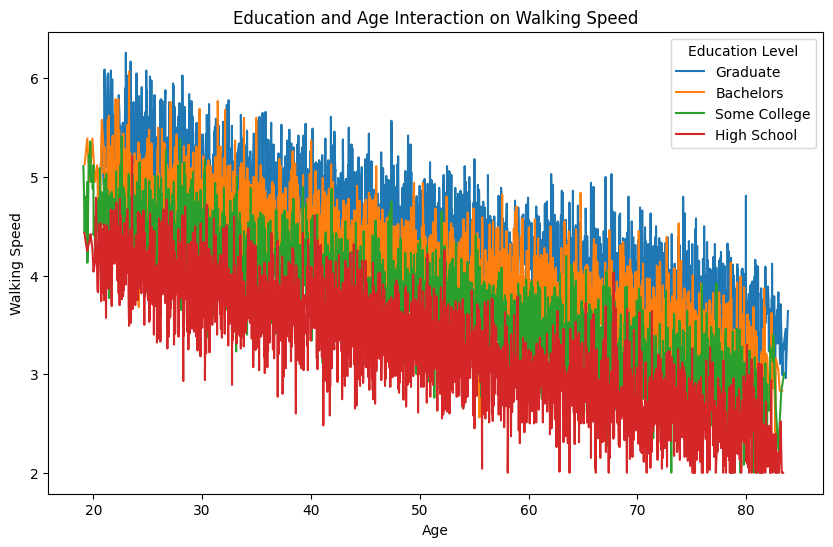

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='walking_speed', hue='education_level', data=myData, errorbar=None)
plt.title("Education and Age Interaction on Walking Speed")
plt.xlabel("Age")
plt.ylabel("Walking Speed")
plt.legend(title="Education Level")
plt.savefig("Lineplot.png")
plt.show()

### Cost Analysis
#### Bar plot of mean costs by insurance type

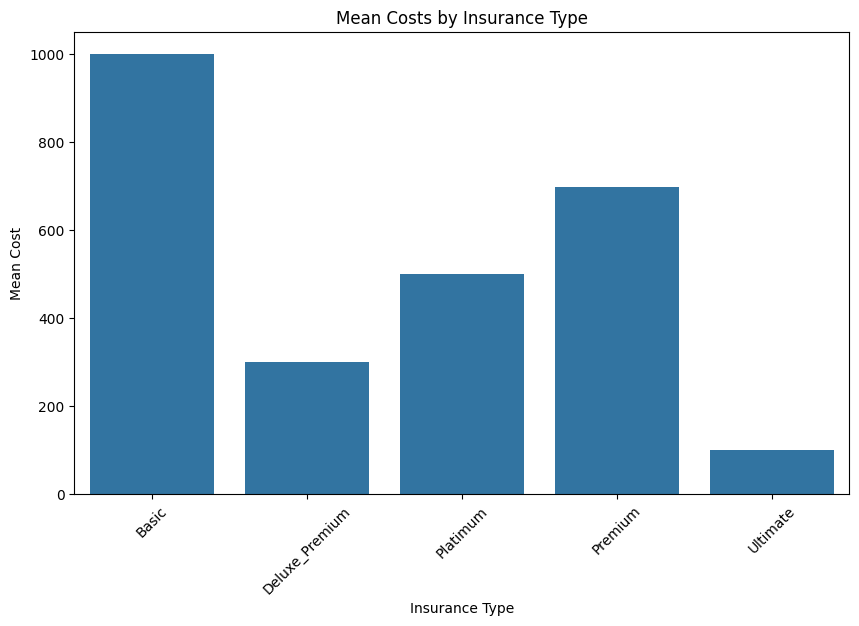

In [9]:
insurance_costs = myData.groupby('insurance_type')['visit_cost'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='insurance_type', y='visit_cost', data=insurance_costs, errorbar="sd")
plt.title("Mean Costs by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Mean Cost")
plt.xticks(rotation=45)
plt.savefig("Barplot2.png")
plt.show()

#### Box plots showing cost distributions

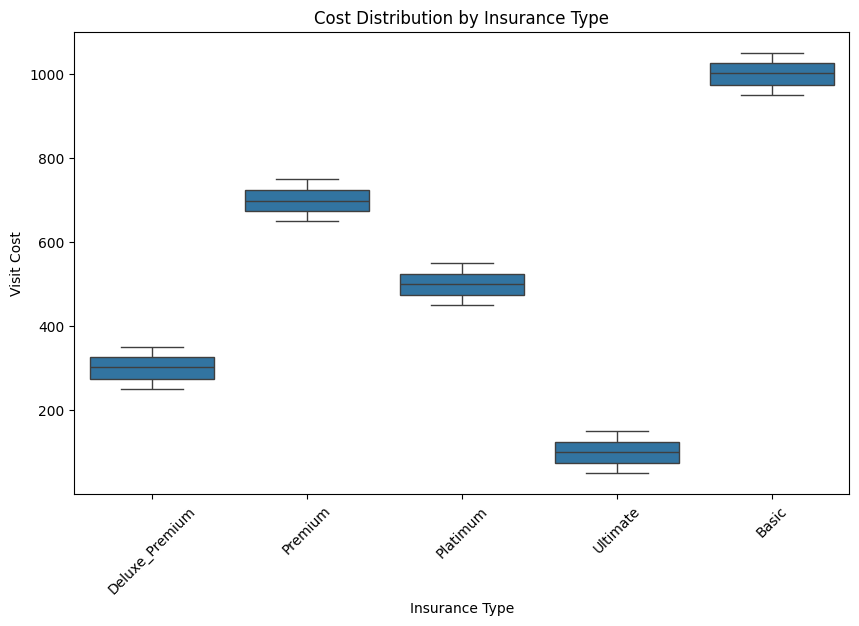

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='insurance_type', y='visit_cost', data=myData)
plt.title("Cost Distribution by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Visit Cost")
plt.xticks(rotation=45)
plt.savefig("Boxplot2.png")
plt.show()

### Combined visualizations
#### Pair plot of key variables

<Figure size 640x480 with 0 Axes>

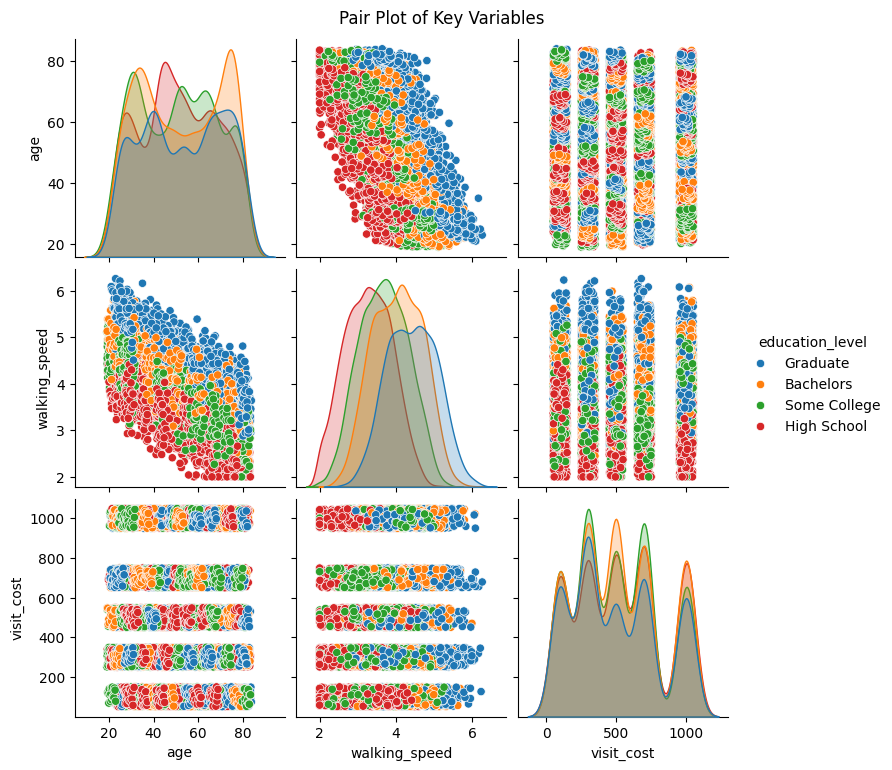

In [11]:
plt.figure()
sns.pairplot(myData[['age', 'walking_speed', 'visit_cost', 'education_level']].dropna(), hue='education_level', palette='tab10')
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.savefig("pairplot.png")
plt.show()

#### Faceted plots by education/insurance

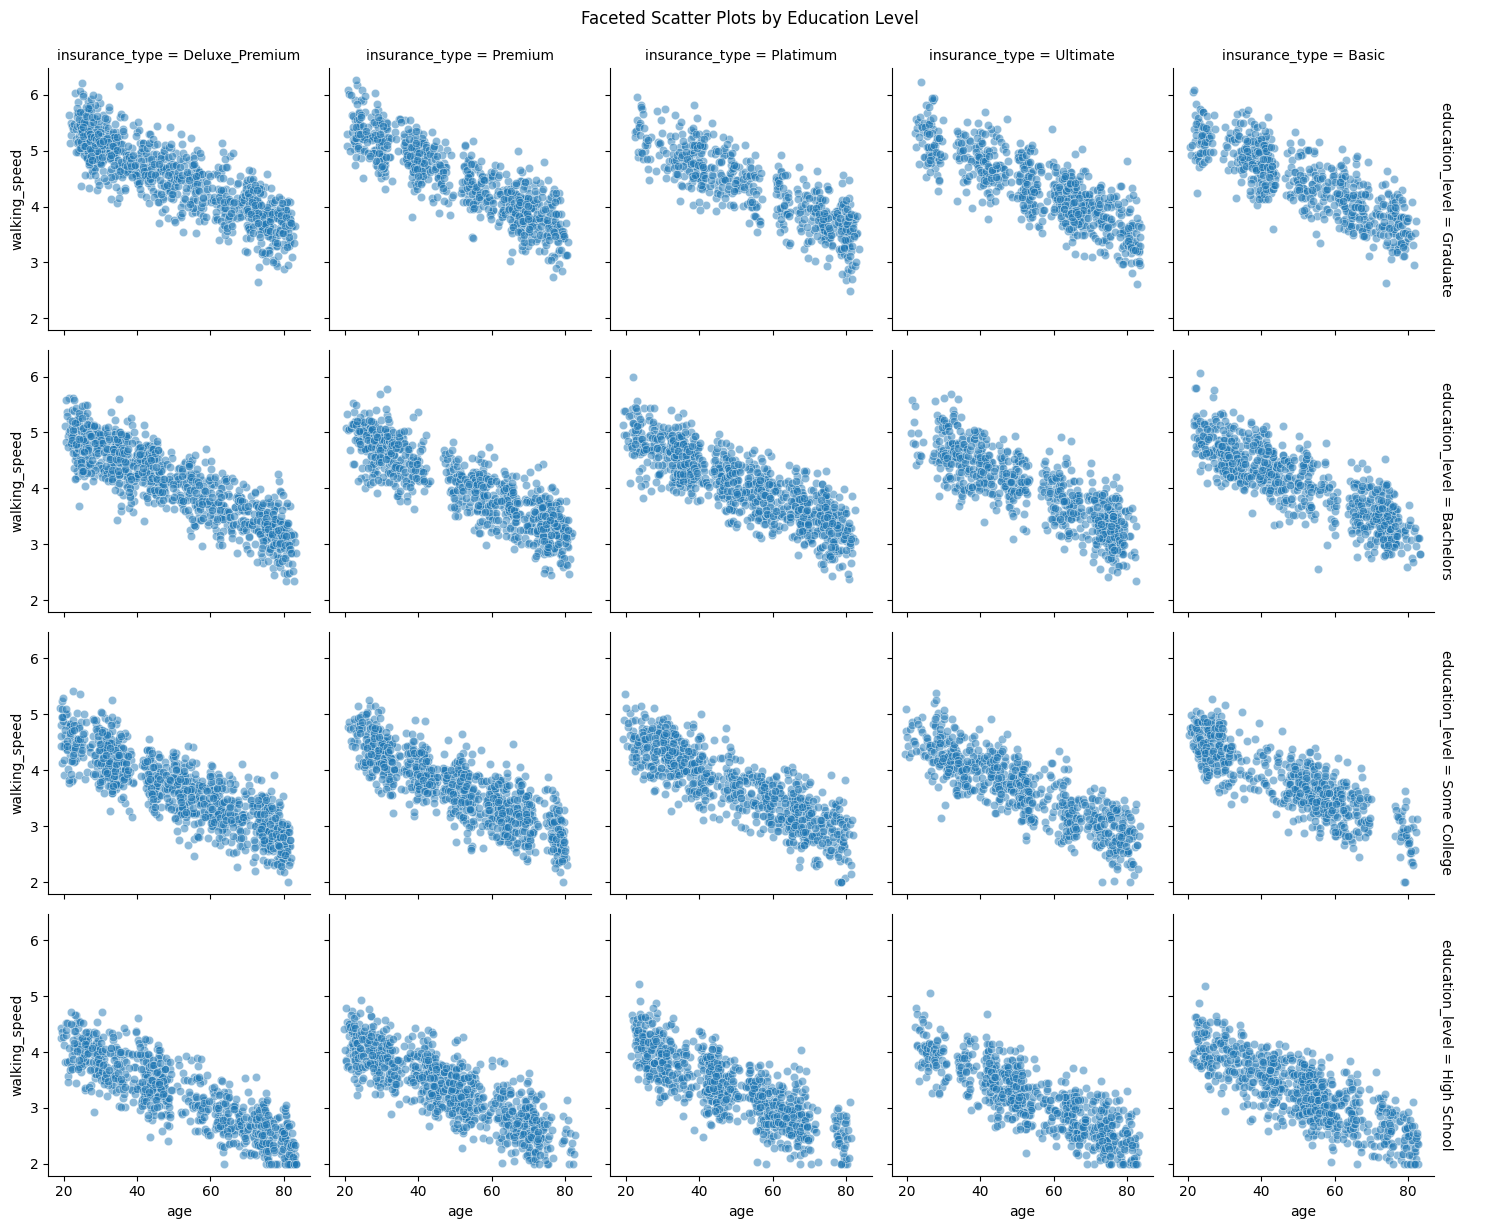

In [12]:
g = sns.FacetGrid(myData, row="education_level", col="insurance_type", margin_titles=True, sharex=True, sharey=True)
g.map(sns.scatterplot, "age", "walking_speed", alpha=0.5)
g.add_legend()
g.fig.suptitle("Faceted Scatter Plots by Education Level", y=1.02)
plt.savefig("scatterplot3.png")
plt.show()

#### Time trends where relevant

/var/folders/gt/wlt9llgj1gv22gh2310dlkch0000gn/T/ipykernel_59001/558999954.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=myData, x="visit_date", y="walking_speed", hue="insurance_type", ci=None)


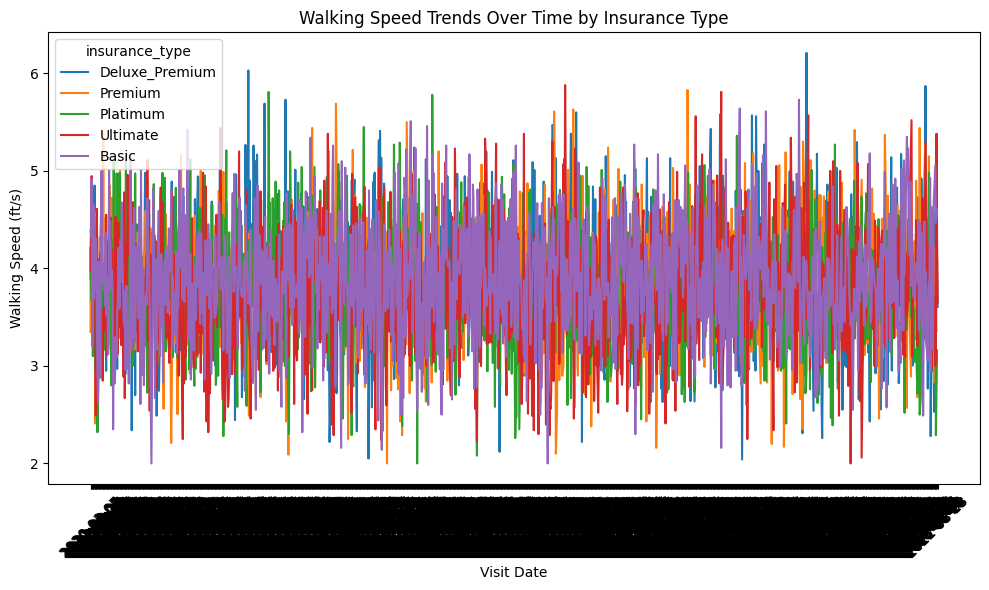

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=myData, x="visit_date", y="walking_speed", hue="insurance_type", ci=None)
plt.title("Walking Speed Trends Over Time by Insurance Type")
plt.xlabel("Visit Date")
plt.ylabel("Walking Speed (ft/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("lineplot3.png")
plt.show()